# DS 3000 - Assignment [6]

**Student Name**: [Yanzhen Chen]

**Date**: [10.10]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: Loading Data (50 pts)
Write python code to answer the questions below and ensure that you round all numeric calculations to 2 decimal places. 

1. (0pts) Load the attached data into a pandas dataframe: diamonds.csv Download diamonds.csv 
This dataset contains the price of diamonds based on various attributes. For more information about the variables, read the description on kaggle.com

In [4]:
import pandas as pd

# load the dataset
data = pd.read_csv('/Users/chenyanzhen/Documents/DS3000/diamonds.csv')
# check the dataset
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


2. (5 pts) Select any two variables of your choice and explain its statistical summary, e.g. mean, median, min, max, etc. Note: you can use the .describe() method from the dataframe to obtain the descriptive statistics, or any suitable approach.

In [6]:
summary_stats = data[['price', 'carat']].describe().round(2)
summary_stats

,price,carat
count,53940.00,53940.00
mean,3932.80,0.80
std,3989.44,0.47
min,326.00,0.20
25%,950.00,0.40
50%,2401.00,0.70
75%,5324.25,1.04
max,18823.00,5.01


- The wide range of variation in diamond prices and carat values suggests that these two variables fluctuate considerably in the dataset.
- The median price of $2,401 is much lower than the maximum price of $18,823, suggesting a long-tailed distribution of diamonds. A few high-priced diamonds significantly increase the overall average.

3. (5 pts) Create a bar chart that shows the frequency of diamonds grouped by cut. Explain the chart.

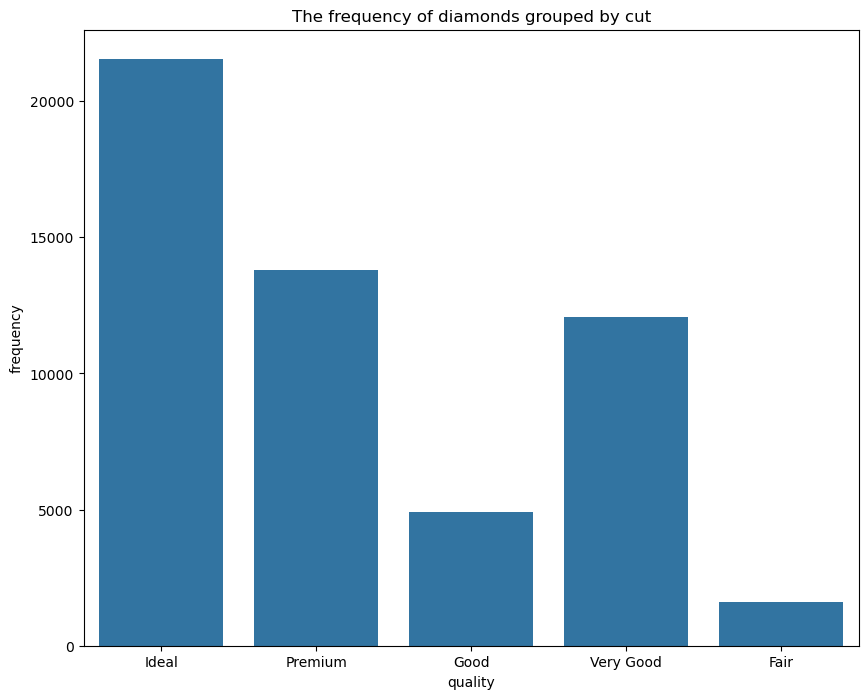

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.countplot(x='cut', data=data)
plt.title('The frequency of diamonds grouped by cut')
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()


As can be seen from this chart, the Ideal cut is the most common cut type in the dataset, followed by Premium and Very Good. in contrast, Good and Fair cuts have significantly fewer diamonds, especially the Fair cut, which appears the least frequently in the dataset. This reflects a consumer preference for higher quality cuts, or their greater popularity in the marketplace.

4. (5 pts) Create a scatterplot that shows the relationship between carat and price. Explain the chart and comment on the relationship between the variables.

plt.figure(figsize = (10,8))
sns.scatterplot(x='carat', y='price', data=data)
plt.title('The relationship between carat and price')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

As can be seen from the graph, the price of diamonds generally increases as the carat weight increases. This shows that there is a positive correlation between the carat weight of a diamond and its price. The data points are densely distributed at low carat weights (below about 2 carats). This indicates that the majority of diamonds are under 2 carats and that the prices of these diamonds are also relatively low, centered around less than 10,000 dollars.
As the carat weight increases above 12 carats, the distribution of data points becomes more sparse. This indicates that diamonds larger than 12 carats are rare, but their prices fluctuate over a wide range and can exceed 15,000 dollars. Some points away from the main data clusters can be seen in the graph, especially for diamonds above 3 carats. These points indicate unusually large and expensive diamonds, which are relatively rare in the dataset.

5. (10 pts) Calculate the Pearson Correlation coefficient of carat and price. Explain the results and discuss the strength of the correlation.

In [41]:
correlation = data['carat'].corr(data['price']).round(2)
correlation

0.92

0.92 indicates a very strong positive correlation. This means that there is a very strong linear relationship between the carat (and price of a diamond. As the carat size of the diamond increases, the price increases significantly and the relationship is linear. In short, carat size is one of the main factors that affects the price of a diamond.

6. (15 pts) Create a histogram (or boxplot) that shows the distribution of prices based on the quality of the cut. Explain the charts and skew.
Note: this question is asking you to show the distribution of diamond prices for each cut. There should be a separate histogram/boxplot for each cut.

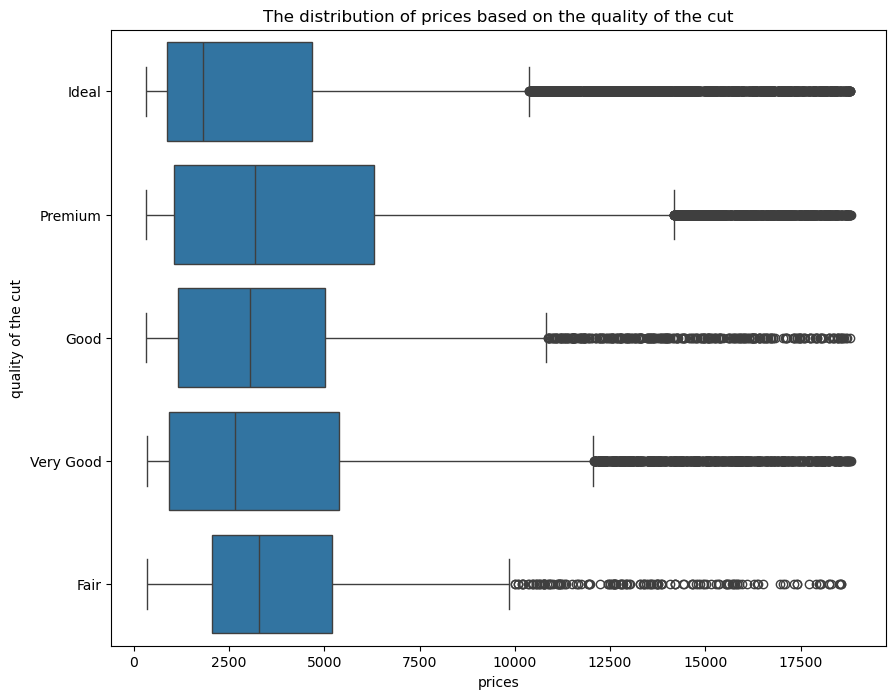

In [45]:
plt.figure(figsize=(10,8))
sns.boxplot(x='price', y='cut', data=data)
plt.title('The distribution of prices based on the quality of the cut')
plt.xlabel('prices')
plt.ylabel('quality of the cut')
plt.show()

As can be seen from the graph, Premium and Ideal cut diamonds are relatively more expensive, with a wider median and spread. The Good and Fair cuts, on the other hand, have relatively low prices, showing the clear influence of different cut qualities on prices.
There are unusually high prices for diamonds in all cut categories, particularly for Ideal and Premium cuts, showing that these high quality cuts are likely to command very high prices in the marketplace.

7. (10 pts) Using a 2-sample t-test**, determine if there is a statistical difference between the price of diamonds with a cut that is considered:
'Good' vs 'Very Good'
'Premium' vs 'Ideal'
**set alpha to 5% i.e. 0.05.

In [49]:
from scipy.stats import ttest_ind

good_prices = data[data['cut'] == 'Good']['price']
very_good_prices = data[data['cut'] == 'Very Good']['price']
premium_prices = data[data['cut'] == 'Premium']['price']
ideal_prices = data[data['cut'] == 'Ideal']['price']

t_stat_1, p_val_1 = ttest_ind(good_prices, very_good_prices, equal_var=False)
t_stat_2, p_val_2 = ttest_ind(premium_prices, ideal_prices, equal_var=False)

alpha = 0.05
if p_val_1 < alpha:
    print(f"There is a significant difference between 'Good' and 'Very Good' (p = {p_val_1:.2f})")
else:
    print(f"There is no significant difference between 'Good' and 'Very Good' (p = {p_val_1:.2f})")

if p_val_2 < alpha:
    print(f"There is a significant difference between 'Premium' and 'Ideal' (p = {p_val_2:.2f})")
else:
    print(f"There is no significant difference between 'Premium' and 'Ideal' (p = {p_val_2:.2f})")



There is no significant difference between 'Good' and 'Very Good' (p = 0.41)
There is a significant difference between 'Premium' and 'Ideal' (p = 0.00)


8. (7 pts) [optional/challenge question] Many statistical test rely on the assumption that data is normally distributed. Indicate which distributions in question 6 were skewed, and research one possible technique* that can be used to handle skewed data. Then perform the following:
Demonstrate the selected technique to correct the skewed data.
Repeat the analysis in question 6 using the corrected data and explain the difference in the distribution with the previous results.
Repeat the statistical tests in question 7. Are there any changes in the statistical significance? Explain the results.
*Helpful tip: Click here to watch a video about correcting skewed data.

In [52]:
from scipy.stats import yeojohnson

data['yeojohnson_price'], lambda_val = yeojohnson(data['price'])
print(f"Yeo-Johnson transformation lambda value: {lambda_val}")


Yeo-Johnson transformation lambda value: -0.06740002634070934


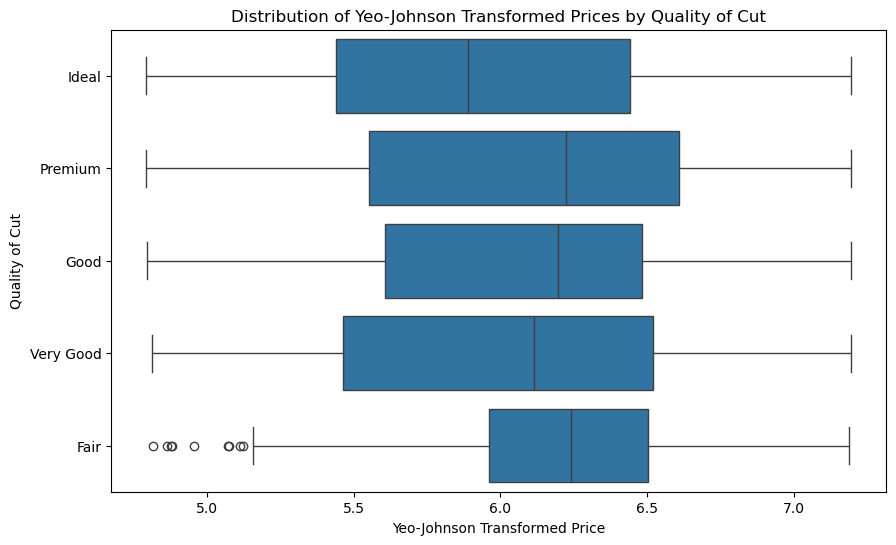

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='yeojohnson_price', y='cut', data=data)
plt.title('Distribution of Yeo-Johnson Transformed Prices by Quality of Cut')
plt.xlabel('Yeo-Johnson Transformed Price')
plt.ylabel('Quality of Cut')
plt.show()


After the Yeo-Johnson transformation, the price distributions at each cut quality become more symmetric. The previous price distribution may have had a more pronounced positive skewed distribution, i.e., a large right tail in the dataset, but now after the transformation, the right tail has been compressed and the overall distribution is closer to normal.
In the original data, many groups showed outliers, especially in the higher price segments. The significant reduction in outliers after the transformation suggests that the Yeo-Johnson transformation effectively handles these extreme data points so that they no longer behave as outliers.

In [26]:
yeojohnson_good_prices = data[data['cut'] == 'Good']['yeojohnson_price']
yeojohnson_very_good_prices = data[data['cut'] == 'Very Good']['yeojohnson_price']
yeojohnson_premium_prices = data[data['cut'] == 'Premium']['yeojohnson_price']
yeojohnson_ideal_prices = data[data['cut'] == 'Ideal']['yeojohnson_price']

t_stat_yeo_1, p_val_yeo_1 = ttest_ind(yeojohnson_good_prices, yeojohnson_very_good_prices, equal_var=False)
t_stat_yeo_2, p_val_yeo_2 = ttest_ind(yeojohnson_premium_prices, yeojohnson_ideal_prices, equal_var=False)

alpha = 0.05
if p_val_yeo_1 < alpha:
    print(f"Yeo-Johnson Transformed T-test: There is a significant difference between 'Good' and 'Very Good' (p = {p_val_yeo_1:.2f})")
else:
    print(f"Yeo-Johnson Transformed T-test: There is no significant difference between 'Good' and 'Very Good' (p = {p_val_yeo_1:.2f})")

if p_val_yeo_2 < alpha:
    print(f"Yeo-Johnson Transformed T-test: There is a significant difference between 'Premium' and 'Ideal' (p = {p_val_yeo_1:.2f})")
else:
    print(f"Yeo-Johnson Transformed T-test: There is no significant difference between 'Premium' and 'Ideal' (p = {p_val_yeo_1:.2f})")


Yeo-Johnson Transformed T-test: There is a significant difference between 'Good' and 'Very Good' (p = 0.00)
Yeo-Johnson Transformed T-test: There is a significant difference between 'Premium' and 'Ideal' (p = 0.00)


In the Yeo-Johnson transformed data, there is a significant difference between the prices of Good cut and Very Good cut diamonds.
In the original data, there may not be a significant difference due to outliers or skewed distributions, but after the Yeo-Johnson transformation, which removes the skew from the data, thus we find a significant difference between the two sets of prices.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.


https://www.youtube.com/watch?v=ngBxYo6FQiI